# Diabetes example (split dataset)
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE787: Machine learning, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

In [1]:
# load diabetes.data
using LinearAlgebra
using PyPlot
using CSV

Diabete_Data = CSV.read(download("https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data"))

n,d = size(Diabete_Data)
d = d-1


--2019-09-26 15:43:50--  https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18496 (18K)
Saving to: ‘/tmp/juliafGgLaX’

     0K .......... ........                                   100% 3.64M=0.005s

2019-09-26 15:43:50 (3.64 MB/s) - ‘/tmp/juliafGgLaX’ saved [18496/18496]



10

In [2]:
# train-test split 

using Random

Random.seed!(787)
rp = randperm(n)
split_ratio = 0.6
n_train = round(Int, n*split_ratio)
n_test = n - n_train

train_id = rp[1:n_train]
test_id = rp[n_train+1:end]

X = zeros(n,d)
y = zeros(n,1)

for i=1:d
    X[:,i] = Diabete_Data[:,i]
end
X = [ones(n,1) X]
y = Diabete_Data[:,end]

X_train = X[train_id,:]
y_train = y[train_id]
X_test = X[test_id,:]
y_test = y[test_id]

println((n_train,n_test))


(265, 177)


In [3]:
# compute the optimal theta

theta_opt = X_train\y_train

# achieved loss
trainMSE = norm(X_train*theta_opt-y_train)^2/n_train
testMSE = norm(X_test*theta_opt-y_test)^2/n_test

println("theta_opt: ", theta_opt)
println("trainMSE: ", trainMSE)
println("testMSE: ", testMSE)

theta_opt: [-283.876, 0.0197447, -26.621, 4.81378, 1.34224, -1.23965, 0.696149, 0.291798, 17.0355, 56.3809, 0.328823]
trainMSE: 2670.597039903857
testMSE: 3406.9126436845104


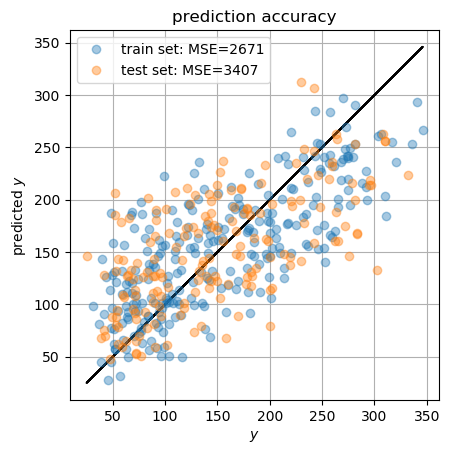

In [4]:
# plot
using Printf

figure()
plot(y,y,"k")
plot(y_train,X_train*theta_opt,"o",alpha=0.4, label="train set: MSE=$(@sprintf("%.0f", trainMSE))")
plot(y_test,X_test*theta_opt,"o",alpha=0.4, label="test set: MSE=$(@sprintf("%.0f", testMSE))")
xlabel(L"$y$")
ylabel(L"predicted $y$")
legend()
title("prediction accuracy")
axis("square")
grid("on")
